<a href="https://colab.research.google.com/github/bambutch/python_classes/blob/main/lesson_12_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Конспект 12

# Функции: синтаксис, логика, применение

В данном уроке мы:  
- узнаем, для чего нам нужны функции;  
- научимся создавать собственные - пользовательские функции;  
- проведем границу между параметрами и аргументами функции;  
- посмотрим, чем отличаются позиционные и именованные аргументы;
- затронем локальные и глобальные переменные;
- познакомимся с анонимными функциями.

**Функция** - набор инструкций, выделенный в отдельный блок.  

К настоящему моменту мы с вами активно использовали `встроенные функции` python и `функции библиотек` (numpy pandas):  
- `print()` - функция вывода, например, на экран;  
- `type()` - функция, возвращающая тип данных;  
- `max()` - поиск максимального значения;  
- `sorted()` - функция сортировки списка;  
- `dict()` - функция преобразования данных в словарь и т.д.

Вы можете писать собственные функции для решения повторяющихся задач - `пользовательские функции`.   

**Примеры аналитических задач, где может потребоваться написание функции**  
1. Визуализации: когда вам необходимо построить аналогичные графики для ряда датасетов.  
2. Заполнение пропусков или формирование нового столбца на основании данных других столбцов.  
3. Проверка статистической значимости результатов А/В тестов: функция бутстрап.

## Определение и использование функции

**Синтаксис определения новой функции**

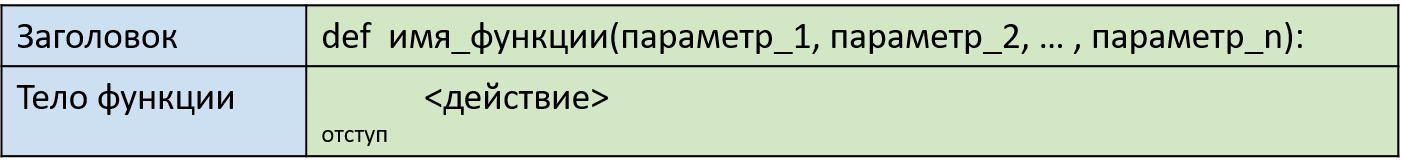

`def` — ключевое слово (definition):  сообщает Python, что начинается определение функции.  
`имя функции`: оно может быть произвольным (ограничения те же, что и для обозначения переменных).  
`пара круглых скобок ()`: внутри них могут быть разделенные запятыми параметры. Параметров может не быть вовсе, может быть один или несколько.  
`двоеточие :` завершает строку определения функции.    
`новая строка + отступ`: 4 пробела или одно нажатие клавиши tab.  
`тело функции`: действия, которые должна осуществлять функция при вызове.    
В теле функции может быть опциональный оператор `return`, возвращающий значение при выходе из функции.

Пользовательская функция определяется по мере необходимости в любой ячейке блокнота.  
Хороший тон - вынести все пользовательские функции в самое начало блокнота к импорту библиотек и модулей.

Функцию можно использовать неограниченное количество раз (**многократный вызов функции**).  
Вызов собственной функции не отличается от вызова встроенной: указываете имя функции и в круглых скобках аргументы.

Создадим две пользовательских функции:  
- функция, которая выполняет действие, но не возвращает значение (вывод подсписков вложенных списков);  
- функция, которая возвращает результат (выручку с учетом предоставленной скидки).

### Пользовательская функция, выполняющая действие

В примерах нескольких уроков выводились подсписки вложенного списка на отдельной строке, используя цикл for (урок_7, урок_11).   
Улучшим старый код, написав функцию.

**Пример**

Вывод подсписков с помощью цикла for.

In [ ]:
# создадим список списков из наименования клиента и годовым объемом продаж
year_purchase = [
    ['name_1', 720],
    ['name_2', 60],
    ['name_3', 240],
    ['name_4', 1200]
]

        
# выведем каждый список из вложенного списка на отдельной строке 
for name in year_purchase:       
    print(name)     

['name_1', 720]
['name_2', 60]
['name_3', 240]
['name_4', 1200]


Функция для вывода подсписков.

In [ ]:
def pretty_nested_list_print(nested_list):                                 #1
    '''                                                                  
    Функция выводит подсписки вложенного словаря на отдельной строке       #2
    '''    
    for name in nested_list:                                               #3
        print(name)                                                 

In [ ]:
# вызовем пользовательскую функцию, вложенный список передадим как аргумент       
pretty_nested_list_print(year_purchase)                                    #4

['name_1', 720]
['name_2', 60]
['name_3', 240]
['name_4', 1200]


В этом примере представлена простая структура функции.   

**`#1`:**  
`def` - ключевое слово, сообщает Python, что вы определяете функцию;  
`pretty_nested_list_print` - имя функции  
`(nested_list)` - параметр функции (вложенный список);  

**`#2`:**  
описание функции, тройные кавычки указывают на то, что это строка;  

**`#3`:**  
тело функции, решает задачу - вывести подсписки на отдельных строках;  

**`#4`:**  
вызов функции - приказывает Python выполнить содержащийся в ней код: `имя_функции(аругмент)`.  

Функцию можно использовать неограниченное количество раз.  
Код вывода подсписков пишется один раз в функции.  
Каждый раз, когда вы захотите вывести подсписки новых вложенных списков, вы вызываете функцию с новыми данными.

### Пользовательская функция, возвращающая значение

Создадим *функцию, рассчитывающую выручку с учетом скидки*:  
- если объем продаж `sale` меньше 120, продажа по цене прейскуранта;  
- если объем продаж `sale` больше или равен 120, но меньше 600 -  продажа по цене прейскуранта минус 100;  
- если объем продаж `sale` больше или равен 600 -  продажа по цене прейскуранта минус 200.

In [ ]:
# определение функции
def get_revenue(sale, price):
    '''
    Функция рассчитывает выручку - на основе цены со скидкой
    '''
    if sale < 120:
        price_with_discount = price 
    elif sale > 600:
        price_with_discount = price - 200
    else:
        price_with_discount = price - 100
    
    return(round(price_with_discount * sale, 2))


In [ ]:
# вызовем функцию для аргументов - sale=240, price=34500

get_revenue(240, 34500)

8256000

В данном примере функция **возвращает значение** фактической выручки.  

Главная ценность возвращаемых значений в том, что их можно использовать в дальнейшем коде:  
- присваивать переменным,  
- совершать с ними разные операции,  
- передавать как аргументы в другие функции.

Вспомним пример из урока_7 "Список списков", в котором мы рассчитывали выручку.  
Попробуем рассчитать выручку, используя функцию `get_revenue()` и вывести значения подсписков, используя функцию `pretty_nested_list_print()`.

In [ ]:
# создание вложенного списка
sales = [
    ['ст. Новоярославская', 'ЯНОС', 840, 821.1, 37780],
    ['ст. Яничкино', 'МНПЗ', 600, 597.523, 37740],
    ['ст. Комбинатская', 'ОНПЗ', 1320, 1321.002, 36690]
]

# цикл
revenue = 0                     # переменная-счетчик       
for row in sales:               # row перебирает все подсписки 
    revenue = get_revenue(row[3], row[4])  # рассчитываем выручку, используя функцию
    row.append(revenue)         # добавляем элемент к подсписку

pretty_nested_list_print(sales) # выведем подсписки на отдельных строках
        

['ст. Новоярославская', 'ЯНОС', 840, 821.1, 37780, 30856938.0]
['ст. Яничкино', 'МНПЗ', 600, 597.523, 37740, 22490765.72]
['ст. Комбинатская', 'ОНПЗ', 1320, 1321.002, 36690, 48203362.98]


## Параметры и аргументы функции

Параметры функции задаются при ее определении в круглых скобках `()`.  
Количество параметров не ограничено, может быть равно 0.

В ранее определенной функции `get_revenue(sale, price)` `sale` и `price` - это параметры функции.

При вызове функции в нее передаются аргументы.  
**Аргументы** — это информация, переданная в функцию.  
Они представляют собой реальные значения, соответствующие параметрам, которые были указаны при объявлении функции.

При вызове функции `get_revenue(240, 34500)` - 240 и 34500 - аргументы.  

Для каждого параметра  функции можно определить **значение по умолчанию**.   
Делается это в блоке параметров функции, формат: `ключ=значение`. Вокруг `=` нет пробелов. Это правило стиля: помогает отличить параметр по умолчанию от присваивания значения переменной.

Если при вызове функции передается аргумент, соответствующий данному параметру, Python использует значение аргумента, а если нет — использует значение по умолчанию. 
Если для параметра определено значение по умолчанию, вы можете опустить соответствующий аргумент при вызове функции.

Значения по умолчанию вы можете присвоить любому количеству параметров.  
Параметры со значениями по умолчанию должны определяться **последними в списке параметров**.

Определим функцию, рассчитывающую цену со скидкой.  
Известно, что чаще всего используется скидка 5%.

In [ ]:
# определение функции
def get_price_discount(price, discount=0.05):
    '''
    Функция рассчитывает цену со скидкой
    '''
    price_with_discount = price * (1 - discount)
    
    return(round(price_with_discount, 2))


Параметр скидка discount имеет значение по умолчанию, в любом вызове `get_price_discount()` ее можно опустить.

In [ ]:
get_price_discount(34500)

32775.0

Можно изменить значение параметра по умолчанию при вызове функции.

In [ ]:
get_price_discount(34500, 0.1)

31050.0

## Позиционные и именованные аргументы

Существуют несколько способов передачи аргументов функциям:
- позиционный  
- именованный.

**Позиционные аргументы** перечисляются в порядке, точно соответствующем порядку записи параметров.  
**Именованные аргументы** состоят из имени параметра и значения.

### Позиционные аргументы

Пока что мы имели дело только с позиционными аргументами.  
При вызове функций в них передаются только **значения**.  
Все эти значения **идут по порядку и соответствуют параметрам**, указанным при определении функции.

In [ ]:
# определение функции
def get_discount_sum(price, discount_sum):
    '''
    Функция рассчитывает цену со скидкой
    '''
    price_with_discount = price - discount_sum
    
    print(price_with_discount)

# вызовем функцию
get_discount_sum(36800, 150)
    

36650


В функции `get_discount_sum()` опеределено два параметра - при вызове функции мы передали два аргумента. То есть *число аргументов точно соответствует числу параметров*.  
Мы передали аргументы *в том же порядке следования*, что и параметры - сначала `price`, затем `discount_sum`.

Попробуем нарушить правила передачи позиционных аргументов.

- число аргументов не соответствует числу параметров функции:

In [ ]:
# число аргументов больше числа параметров
get_discount_sum(36800, 150, 2)


TypeError: get_discount_sum() takes 2 positional arguments but 3 were given

In [ ]:
# число аргументов меньше числа параметров
get_discount_sum(36800)


TypeError: get_discount_sum() missing 1 required positional argument: 'discount_sum'

Python в обоих случаях указал на ошибку несоответствия количества аргументов числу параметров.

- порядок следования аргументов не соответствует порядку следования параметров функции

In [ ]:
get_discount_sum(150, 36800)


-36650


Синтаксической ошибки нет - есть смысловая ошибка: цена не может быть отрицательной величиной

### Именованные аргументы

В случае именованных аргументов при вызове функции не просто передаются значения.    
Указывается **имя параметра**, за затем **значение**, которое хотите ему присвоить (ключ=значение).  
Все ключи совпадают с параметрами, указанными при определении функции.

Передадим функции `get_discount_sum()` именованные аругменты.

In [ ]:
get_discount_sum(price=36800, discount_sum=150)

36650


Порядок передачи именованных аргументов не имеет большого значения.
Можно написать код следующим образом, и это не вызовет ошибку.

In [ ]:
get_discount_sum(discount_sum=150, price=36800)

36650


Количество передаваемых аргументов по-прежнему имеет значение.

In [ ]:
get_discount_sum(price=36800)

TypeError: get_discount_sum() missing 1 required positional argument: 'discount_sum'

Именованные аргументы удобны при большом количестве параметров функции.

### Комбинация способов передачи аргументов

При вызове функции можно использовать одновременно и позиционные, и именованные аргументы.  
В этом случае порядок имеет значение.  
Позиционные аргументы всегда идут первыми. Все именованные аргументы должны следовать за позиционными.

In [ ]:
# определение функции
def get_sale_param(sale, price, discount_sum):
    '''
    Функция рассчитывает параметры отгрузки
    '''
    price_with_discount = price - discount_sum
    revenue = price_with_discount * sale
      
    print(sale, price_with_discount, revenue, sep = '\n')

In [ ]:
get_sale_param(240, 36800, discount_sum=150)

240
36650
8796000


Изменим порядок следования позиционных и именованных аргументов.

In [ ]:
get_sale_param(240, discount_sum=150, 36800)

SyntaxError: positional argument follows keyword argument (<ipython-input-19-bb02fe820b5a>, line 1)

Python указал на ошибку: позиционный аргумент следует за именованным аргументом.

Смешанная запись бывает удобна, когда у функции есть обязательные параметры и множество необязательных.

## Локальные и глобальные переменные

Когда вы создаете переменную внутри функции, она является **локальной**, что означает, что она существует только внутри функции.

Вернемся к функции `get_discount_sum()`.

In [ ]:
# определение функции
def get_discount_sum(price, discount_sum):
    '''
    Функция рассчитывает цену со скидкой
    '''
    price_with_discount = price - discount_sum
    
    print(price_with_discount)

Когда выполнение функции `get_discount_sum()` завершается, переменная `price_with_discount` уничтожается. Если мы попытаемся вывести ее, то получим исключение.

In [ ]:
# вызовем функцию
get_discount_sum(36800, 150)

36650


In [ ]:
print(price_with_discount)

NameError: name 'price_with_discount' is not defined

**Глобальные переменные** — это те, что объявлены вне функций. К ним можно обращаться откуда угодно. 

In [ ]:
# глобальная переменная price
price = 36800

# определение функции
def get_discount_sum(price, discount_sum):
    '''
    Функция рассчитывает цену со скидкой
    '''
    price_with_discount = price - discount_sum
    
    print(price_with_discount)

# вызов функции    
get_discount_sum(price, 150)    

36650


## Анонимные функции

В Python можно определить функцию, не давая ей имени- **анонимную функцию**.  
Обычные функции определяются с помощью ключевого слова `def`, анонимные функции определяются с помощью ключевого слова `lambda`.

**Синтаксис**  
`lambda [arg1, arg2, ..]: [выражение]`


Лямбда-функции бывают полезны в случаях, когда нужна небольшая одноразовая функция. 

**Пример**  
Отсортируем список с данными по продажам по объему отгрузки с помощью лямбда-функции.

In [ ]:
# создание вложенного списка
sales = [
    ['ст. Новоярославская', 'ЯНОС', 840, 821.1, 37780],
    ['ст. Яничкино', 'МНПЗ', 600, 597.523, 37740],
    ['ст. Комбинатская', 'ОНПЗ', 1320, 1321.002, 36690]
]

# сортируем список по объему отгрузки - это элемент с индексом [3]
sorted_sales = sorted(sales, key = lambda row: row[3])

# выводим сортированный список
for row in sorted_sales:               
    print(row) 

['ст. Яничкино', 'МНПЗ', 600, 597.523, 37740]
['ст. Новоярославская', 'ЯНОС', 840, 821.1, 37780]
['ст. Комбинатская', 'ОНПЗ', 1320, 1321.002, 36690]


Преобразование элементов списка с помощью лямбда-функции. 
Рассчитаем количество отгруженных вагонов для списка с объемами отгрузки, исходя из нормы загрузки вагона - 60 тонн.

Кроме лямбда-функции используем функцию `map()` и функцию `list()`.

**Синтаксис `map()` для списка**:  
`map (функция, список)`  

**Описание**:  
`map()` применяет функцию к каждому элементу в списке.  

Для того, чтобы получить новый список - результат работы `map()` необходимо преобразовать в список с помощью функции `list()`.

In [ ]:
# список с объемом отгруженной продукции в тоннах
sale = [540, 240, 1320, 660, 60, 420]

# рассчитаем отгрузку в вагонах
number_of_tanks = list(map(lambda number: number / 60, sale))

# выведем количество вагонов
print(number_of_tanks)

[9.0, 4.0, 22.0, 11.0, 1.0, 7.0]


## Итоги
1. Функция - набор инструкций, выделенный в отдельный блок. Функции сделают ваш код компактнее и читабельнее.  
Использование функций соотвествует принципу программирования Python - Don't Repeat Yourself - не повторяйся.
2. В Python есть встроенные функции. Для решения повторяющихся задач можно написать *пользовательскую функцию*.  
3. Обявление пользовательской функции:  
    `def имя_функции(параметр_1, параметр_2, … , параметр_n):`  
    `....<действие>`
4. Функция может производить действие или возвращать значение (в теле функции должен быть оператор `return`).  
5. Параметры функции задаются при ее определении в круглых скобках `()`.  
6. Аргументы - реальные значения, соответствующие параметрам, которые были указаны при объявлении функции.  
7. Для параметра  функции можно определить *значение по умолчанию*. Если для параметра определено значение по умолчанию, можно опустить соответствующий аргумент при вызове функции.   
8. *Позиционные аргументы* перечисляются в порядке, точно соответствующем порядку записи параметров. При вызове функций в аргументы передаются только значения.  
9. *Именованные аргументы* передаются при вызове функции в формате `(имя_параметра=значение)`.  Порядок передачи именованных аргументов не имеет большого значения
10. При вызове функции можно использовать одновременно и позиционные, и именованные аргументы. Порядок передачи аргументов - сначала позиционные, затем именованные.  
11. Глобальные переменные — переменные, которые объявлены вне функций. К ним можно обращаться откуда угодно.   
12. Переменные, объявленные внутри функции — локальные. К ним обратиться из кода вне тела функции нельзя.  
13. В Python можно определить функцию, не давая ей имени- *анонимную функцию*: `lambda [arg1, arg2, ..]: [выражение]`   


## При подготовке конспекта использованы:

1. [Функции в Python — синтаксис, аргументы, вызов, выход](https://pythonchik.ru/osnovy/funkcii-v-python)  
2. [Функция в Python: руководство для начинающих](https://pythonist.ru/funkcziya-v-python-rukovodstvo-dlya-nachinayushhih/)  
3. [Функции и их аргументы в Python 3](https://pythonist.ru/funkczii-i-ih-argumenty-v-python-3/)  
4. [Встроенные функции Python: какие нужно знать и на какие не стоит тратить время](https://tproger.ru/translations/python-built-ins-worth-learning/)
5. [Аллен Б. Дауни Основы Python. Научитесь думать как программист](https://t.me/python_360_reserv/16) 
6. Мэтиз Эрик. Изучаем Python. Программирование игр, визуализация данных, веб-приложения.  
7. Наоми Седер Python. Экспресс-курс. 
8.[Lambda-функции в Python с их синтаксисом и примерами](https://pythonist.ru/lambda-funkczii-v-python-s-ih-sintaksisom-i-primerami/)  
9. [Функция map() в Python](https://pythonist.ru/funkcziya-map-v-python/)
